In [25]:
# Libraries
from functions import connect_to_database
from credentials import user,password,host,database_name
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

### Connect to Database

In [83]:
# Conect to Database
engine = connect_to_database(user,password,host,database_name)

In [84]:
cortescomunicados = pd.read_sql_query("""select * from cortescomunicados""", engine)
cortespreventivos = pd.read_sql_query("""select * from cortespreventivos""", engine)
cortesprogramados = pd.read_sql_query("""select * from cortesprogramados""", engine)
cortesserviciobaja = pd.read_sql_query("""select * from cortesserviciobaja""", engine)
cortesserviciomedia = pd.read_sql_query("""select * from cortesserviciomedia""", engine)
general = pd.read_sql_query("""select * from general""", engine)

In [94]:
general.head()

,empresa,fuente,totalUsuariosAyer,totalUsuariosConSuministro,totalUsuariosSinSuministro,ultimaActualizacion,created_on,company
0,EDESUR,Web Service,34.164,2.530.568,3612,12:55,2019-11-06 13:03:20,edesur
1,EDENOR,Web Service,54.468,2.994.375,4116,12:55,2019-11-06 13:03:20,edenor
2,EDESUR,Web Service,34.164,2.530.577,3603,13:00,2019-11-06 13:08:20,edesur
3,EDENOR,Web Service,54.468,2.994.375,4116,13:00,2019-11-06 13:08:20,edenor
4,EDESUR,Web Service,34.164,2.530.576,3604,13:10,2019-11-06 13:13:21,edesur


In [86]:
general['created_on'] = pd.to_datetime(general['created_on'], format = '%Y-%m-%d %H:%M:%S')
#general['ultimaActualizacion'] = pd.to_datetime(general['ultimaActualizacion'], format = '%H:%M')
general['totalUsuariosSinSuministro'] = general['totalUsuariosSinSuministro'].str.replace('.','')
general['totalUsuariosSinSuministro'] = pd.to_numeric(general['totalUsuariosSinSuministro'])

### Plots

#### Time Series

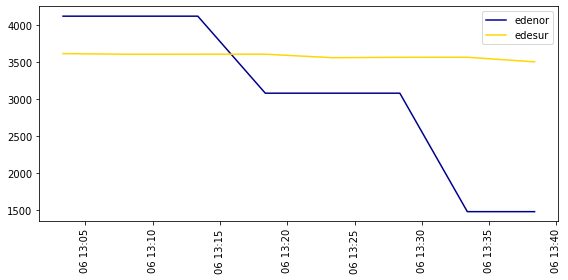

In [90]:
# Define canvas
nrows = 1
ncols = 1

fig,ax1 = plt.subplots(figsize = (8,4), nrows = nrows,ncols = ncols)

# Data 
edenor_general = general.loc[general['company']== 'edenor']
edesur_general = general.loc[general['company']== 'edesur']

# Add axis
ax1.plot(edenor_general['created_on'],edenor_general['totalUsuariosSinSuministro'], c = 'darkblue', label = 'edenor')
ax1.plot(edesur_general['created_on'],edesur_general['totalUsuariosSinSuministro'], c = 'gold', label = 'edesur')

# Axis set up
plt.xticks(rotation = 90)

# Legend set up
ax1.legend()

# Title set up

fig.tight_layout()

No handles with labels found to put in legend.


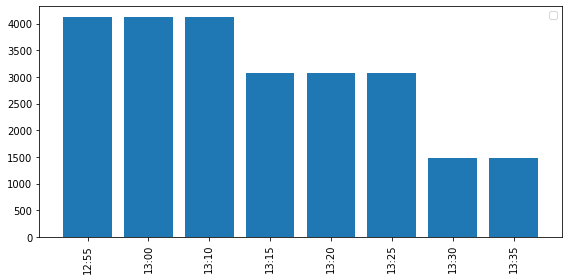

In [91]:
# Define canvas
nrows = 1
ncols = 1

fig,ax1 = plt.subplots(figsize = (8,4), nrows = nrows,ncols = ncols)

# Data 
edenor_general = general.loc[general['company']== 'edenor']
edesur_general = general.loc[general['company']== 'edesur']

# Add axis
ax1.bar(edenor_general['ultimaActualizacion'],edenor_general['totalUsuariosSinSuministro'])

# Axis set up
plt.xticks(rotation = 90)

# Legend set up
ax1.legend()

# Title set up

fig.tight_layout()

####  Cortes programados

In [96]:
cortesprogramados.head()

,localidad,normalizacion,partido,subestacion_alimentador,usuarios,created_on,company
0,ADROGUE,2019-11-06 18:00,ALMIRANTE BROWN,180-ALMIRANTE BROWN / R:180-4-46 / 180-4-46,196,2019-11-06 13:03:20,edesur
1,BURZACO,2019-11-06 18:00,ALMIRANTE BROWN,180-ALMIRANTE BROWN / R:180-4-46 / 180-4-46,173,2019-11-06 13:03:20,edesur
2,BERAZATEGUI CENTRO,Sin datos,BERAZATEGUI,85-CALCHAQUI / R:085-1-15 / 085-1-15,323,2019-11-06 13:03:20,edesur
3,BERAZATEGUI CENTRO,2019-11-06 15:43,BERAZATEGUI,85-CALCHAQUI / R:085-2-21 / 085-2-21,377,2019-11-06 13:03:20,edesur
4,LANUS OESTE,2019-11-06 19:00,LANUS,87-ESCALADA / R:087-1-07 / 087-1-07,1261,2019-11-06 13:03:20,edesur


In [ ]:
# Disconect from database
engine.dispose()